# Exercise 1 : Fraudulent Transactions (Classification)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Exercise"

D:\Exercise


In [3]:
fraud = pd.read_csv('fraud_prep.csv')# reading the data

# Exploratory Data Analysis.

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [8]:
fraud.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Missing Data

Missing Data.
We can use seaborn to create a simple heatmap to see where we are missing data!

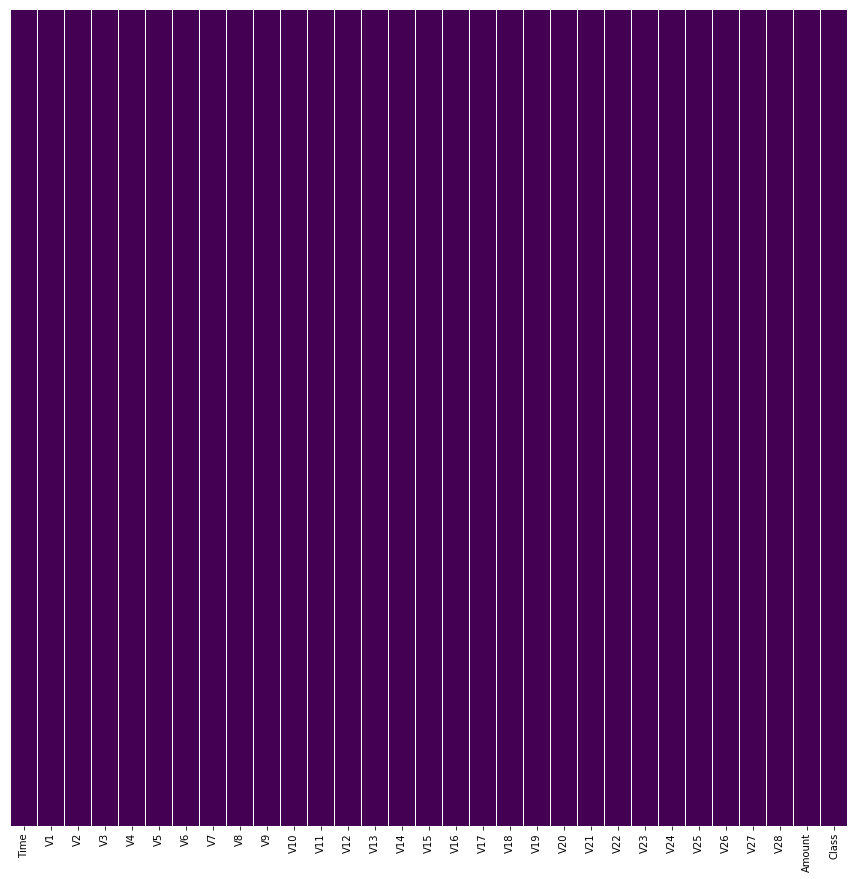

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(fraud.isnull(),yticklabels=False,cbar=False,cmap='viridis')

  -----

As you can see in this heatmap there is no horizental yellow line which meen we do not have any missing data.

---------

# Logistic Regression

In [19]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fraud.drop('Class',axis=1), 
                                                    fraud['Class'], test_size=0.30, 
                                                    random_state=101)

 # Training and Predicting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions = logmodel.predict(X_test)

Evaluation.
We can check precision,recall,f1-score using classification report and confiusion matrix!

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print("/n")
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.82      0.60      0.69       144

avg / total       1.00      1.00      1.00     85443

/n
[[85280    19]
 [   58    86]]


# K-flod cross validation

The most popular resampling technique is k-fold cross validation. It allows us to train and test our model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.The accuracies measures help us to understand the ability of generalisation for our model.

In [28]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.998976746655
/n
8.74474055643e-05


----

----

# Decision Trees and Random Forests

We'll start just by training a single decision tree.

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prediction and Evaluation.
Let's evaluate our decision tree.

In [32]:
predictions = dtree.predict(X_test)

In [18]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.71      0.74      0.73       144

avg / total       1.00      1.00      1.00     85443



In [19]:
print(confusion_matrix(y_test,predictions))

[[85255    44]
 [   37   107]]


In [33]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.999127228196
/n
0.000145702506698


------------

# Random Forests



 Now let's compare the decision tree model to a random forest.

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))

[[85292     7]
 [   28   116]]


In [27]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.94      0.81      0.87       144

avg / total       1.00      1.00      1.00     85443



for n_estimators=100

[[85292     7]
 [   30   114]]

precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.94      0.79      0.86       144

avg / total       1.00      1.00      1.00     85443


In [36]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.999513453584
/n
9.79021224335e-05


----

# K Nearest Neighbors 

Standardize the Variables


Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(fraud.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(fraud.drop('Class',axis=1))

In [9]:
fraud_feat = pd.DataFrame(scaled_features,columns=fraud.columns[:-1])
fraud_feat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,fraud['Class'],
                                                    test_size=0.30,random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1) # We'll start with k=1

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

Let's evaluate our KNN model!

In [42]:
print(confusion_matrix(y_test,pred))

[[85277    22]
 [   28   116]]


In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.84      0.81      0.82       144

avg / total       1.00      1.00      1.00     85443



----

# Choosing a K Value

We can use the elbow method to pick a good K Value.By choosing different k value we calculate the error rate of the model.We choose the first K value which seems to have minimum error rate by using elbow graph.

In [12]:
error_rate = []

# Will take some time
for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

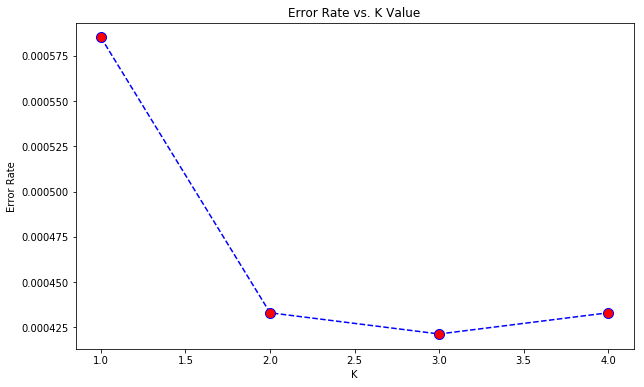

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[85290     9]
 [   27   117]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.93      0.81      0.87       144

avg / total       1.00      1.00      1.00     85443



In [39]:
#K-flod cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print('/n')
print(accuracies.std())

0.998389880469
/n
8.22546705754e-05


-----

# Support Vector Machines-SVM

We need to come back to our original data which is not scaled

In [6]:
fraud = pd.read_csv('fraud_prep.csv')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fraud.drop('Class',axis=1), 
                                                    fraud['Class'], test_size=0.30, 
                                                    random_state=101)

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

Evaluation

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[85299     0]
 [  139     5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       1.00      0.03      0.07       144

avg / total       1.00      1.00      1.00     85443

NOT so good results!!.We can just classify one class by this model.So we need to adjuste the parameters.We can search for parameters using a GridSearch!

-----------

# Gridsearch

Finding the right parameters (like what C or gamma values to use) will take time, we can just try a bunch of combinations and see what works best! 
GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.My undrestanding (for the above SVM it takes me 2 hour to get the result) it is costy for any large datasets, so I put the codes here which I executed for smaller problems without any issues.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3) # verbose just means the text output describing the process

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))
print('/n')
print(classification_report(y_test,grid_predictions))

-------------

# Artificial Neural Network

In [2]:
import theano
import tensorflow
import keras

Using Theano backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fraud.drop('Class',axis=1), 
                                                    fraud['Class'], test_size=0.30, 
                                                    random_state=101)


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 30))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix and classfication report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85299,     0],
 [  144,     0]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.00      0.00      0.00       144

avg / total       1.00      1.00      1.00     85443

To have better performance for ANN we need to do Gridsearch by trying some parameters for input_dim and activation function as we have done for SVM.

# Comparison of results:

As we can see the KNN (k =3,f1-score: 1,0.87) and Random forest (f1-score: 1,0.86) models have better performances.
Trying to grid search for SVM and ANN will take time.But by doing this search for these models it is possible to find a good model as well.

BONUS Points : Can you think of some unsupervised methods to accomplish this same task? If so, describe them (do not script them) 

Answer:I think we can use K Means Clustering model to do unsupervised classification without looking at the Class column in our data set. 

# Thank you !